
#**Problem Statement 1: Data Science Task**

In [1]:
## connecting gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#doing the necessary installation
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.7 MB/s eta 0:00:00


In [3]:
## necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Data Read**

In [48]:
df = pd.read_csv('/content/drive/MyDrive/Assessment/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

###**Details of the Columns Present in the data**

**customerID**: Unique customer identifier.

**gender**: Customer's gender .

**SeniorCitizen**: Indicates if the customer is 65 or older: Yes, No

**Partner**: Indicates if customer has a partner .

**Dependents**: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

**tenure**: Number of months with the company.

**PhoneService**: Indicates if the customer subscribes to home phone service with the company: Yes, No

**MultipleLines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

**InternetService**: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

**OnlineSecurity**: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

**OnlineBackup**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

**DeviceProtection**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

**TechSupport**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

**StreamingTV**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**StreamingMovies**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Contract**: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

**PaperlessBilling**: Indicates if the customer has chosen paperless billing: Yes, No

**PaymentMethod**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

**MonthlyCharges**: Indicates the customer’s current total monthly charge for all their services from the company.

**TotalCharges**: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

**Churn**: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.



##**Data Preprocessing**

In [8]:
df.shape

(7043, 21)

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


##**EDA**

**EDA in machine learning refers to Exploratory Data Analysis, a critical initial step in data processing. It involves examining and visualizing datasets to understand their main characteristics, often using statistical graphics and other data visualization methods.**

In [12]:
gender_count = df['gender'].value_counts()
gender_count

,count
gender,
Male,3555
Female,3488


In [13]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


**Now focus on the customer who churned i.e. left the service and will understand their pattern**

In [14]:
# Defining the dataset for the churn customer

churned_customers = df[df['Churn']=='Yes']

In [15]:
churned_customers.shape

(1869, 21)

In [16]:
## Percentage of custome who churned

len(churned_customers)/len(df)

0.2653698707936959

So more than 25% of the customer churned

In [17]:
churned_by_gender = churned_customers.groupby('gender').size().reset_index(name='Total Churned')

**Insights for customer Churn**

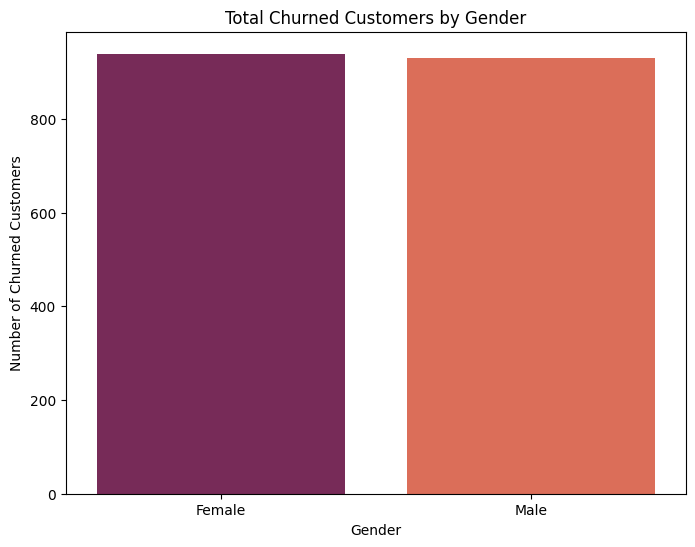

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='Total Churned', data=churned_by_gender, palette='rocket')
plt.title('Total Churned Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Churned Customers')
plt.show()

It seems almost equal no of both male and female customer has churned

In [19]:
churned_by_partner = churned_customers['Partner'].value_counts()
churned_by_partner

,count
Partner,
No,1200
Yes,669


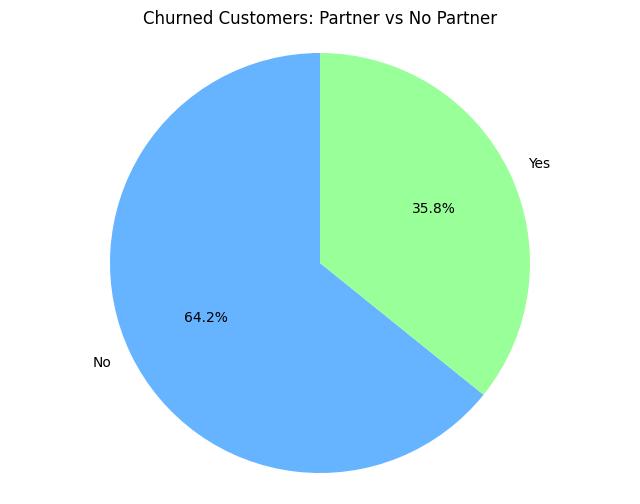

In [20]:
plt.figure(figsize=(8, 6))
plt.pie(churned_by_partner, labels=churned_by_partner.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], startangle=90)
plt.title('Churned Customers: Partner vs No Partner')
plt.axis('equal')
plt.show()

tendecy of non-partner account to churn is more

In [21]:
payment_count = churned_customers['PaymentMethod'].value_counts()
payment_count

,count
PaymentMethod,
Electronic check,1071
Mailed check,308
Bank transfer (automatic),258
Credit card (automatic),232


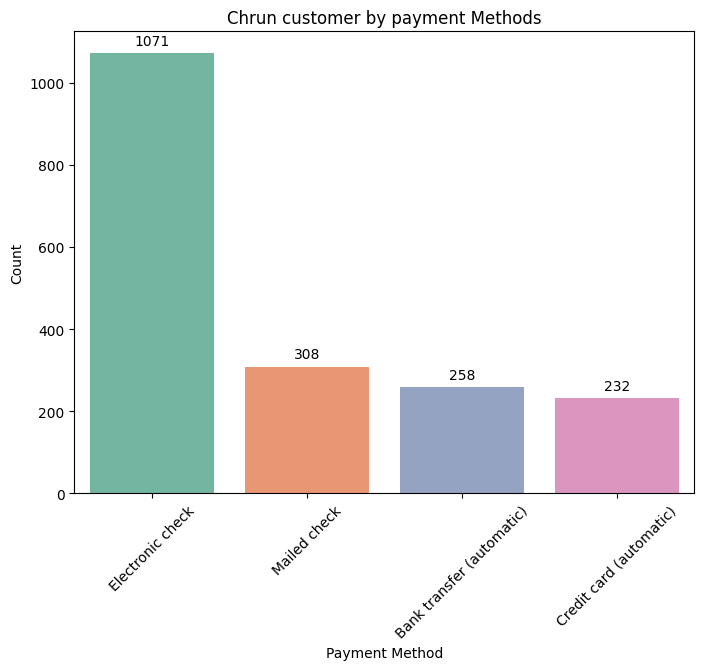

In [22]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=payment_count.index,y=payment_count.values,palette='Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.title('Chrun customer by payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

tendency to churn is more by customer who use Electronic check

In [23]:
contract_count = churned_customers['Contract'].value_counts()
contract_count

,count
Contract,
Month-to-month,1655
One year,166
Two year,48


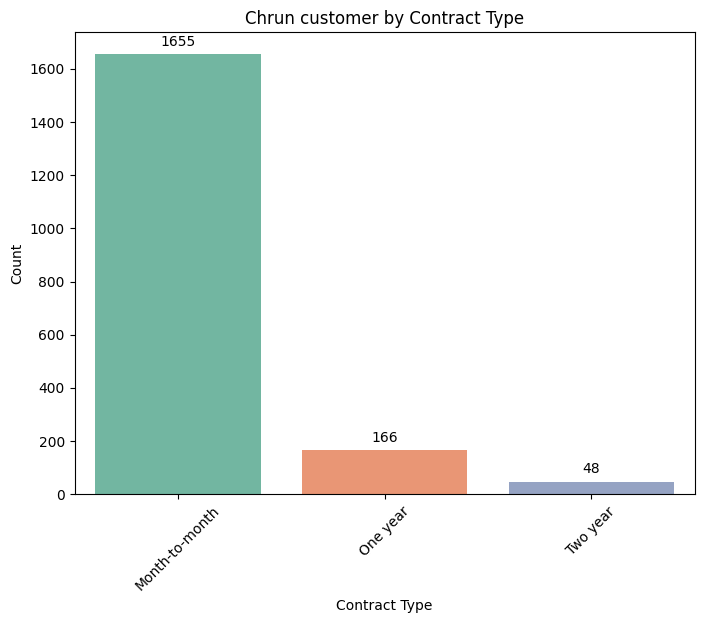

In [24]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=contract_count.index,y=contract_count.values,palette='Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.title('Chrun customer by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

customers who opted the monthly service have more tendency to churn

In [25]:
# churned_customers['tenure'].value_counts()

In [26]:
churned_customers['tenure'].unique()

array([ 2,  8, 28, 49, 10,  1, 47, 17,  5, 34, 11, 15, 18,  9,  7, 12, 25,
       68, 55, 37,  3, 27, 20,  4, 58, 53, 13,  6, 19, 59, 16, 52, 24, 32,
       38, 54, 43, 63, 21, 69, 22, 61, 60, 48, 40, 23, 39, 35, 56, 65, 33,
       30, 45, 46, 62, 70, 50, 44, 71, 26, 14, 41, 66, 64, 29, 42, 67, 51,
       31, 57, 36, 72])

**a new feature that indicates customer tenure length in months**

In [27]:
bins = [0, 6, 12, 18, 24, churned_customers['tenure'].max()]
labels = ['0-6 Months', '6-12 Months', '12-18 Months', '18-24 Months', '>24 Months']
churned_customers['tenure_group'] = pd.cut(churned_customers['tenure'], bins=bins, labels=labels)

In [28]:
grouped = churned_customers.groupby('tenure_group').size().reset_index(name='total_churned_customers')

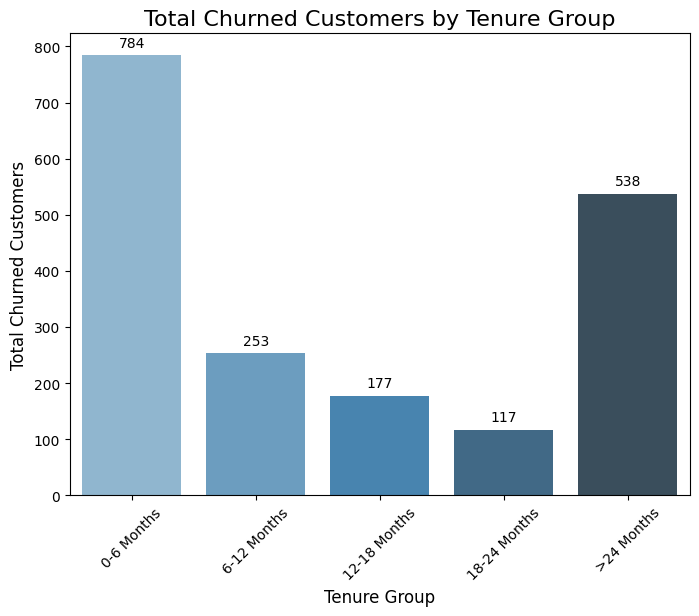

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(x='tenure_group', y='total_churned_customers', data=grouped, palette='Blues_d')

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 9),
                       textcoords='offset points')

plt.title('Total Churned Customers by Tenure Group', fontsize=16)
plt.xlabel('Tenure Group', fontsize=12)
plt.ylabel('Total Churned Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [30]:
InternetService_count = churned_customers['InternetService'].value_counts()
InternetService_count

,count
InternetService,
Fiber optic,1297
DSL,459
No,113


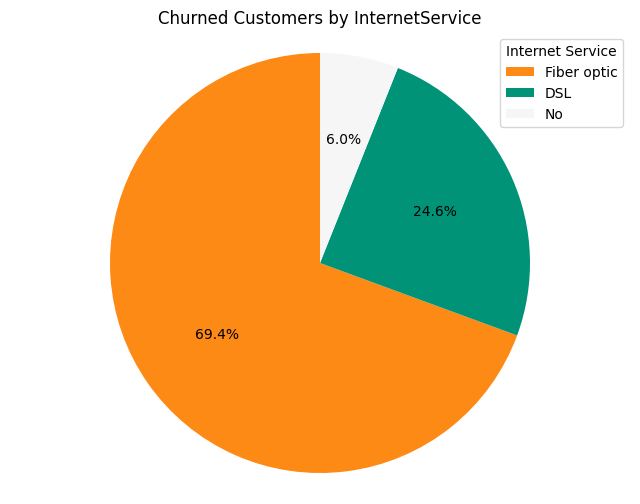

In [31]:
plt.figure(figsize=(8, 6))
plt.pie(InternetService_count, labels=None, autopct='%1.1f%%', colors=['#FC8A15','#009378','#F6F6F6'], startangle=90)
plt.legend(InternetService_count.index, title="Internet Service", loc="best")
plt.title('Churned Customers by InternetService')
plt.axis('equal')
plt.show()

In [32]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [33]:
churned_customers = df[df['Churn']=='Yes']

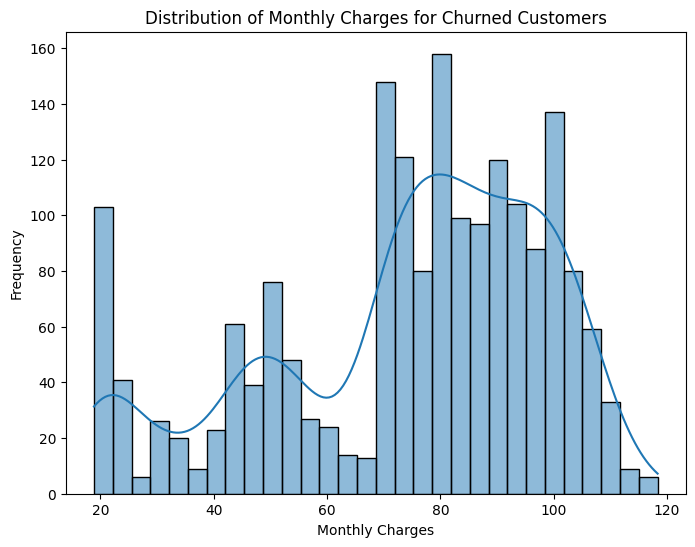

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(churned_customers['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribution of Monthly Charges for Churned Customers')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

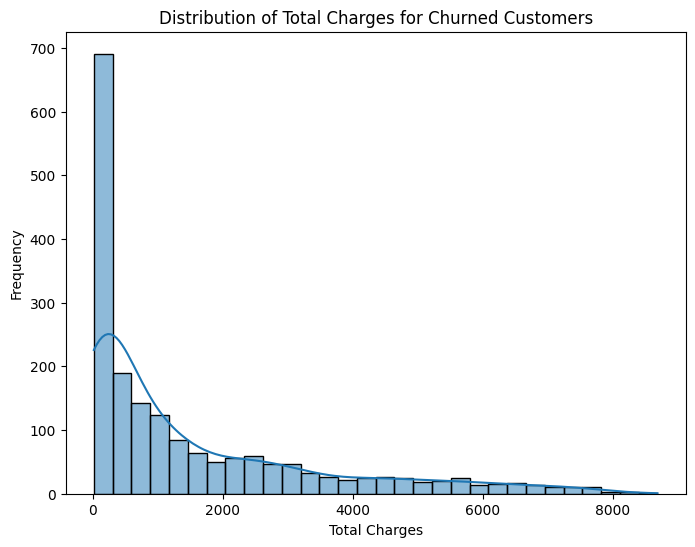

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(churned_customers['TotalCharges'], bins=30, kde=True)
plt.title('Distribution of Total Charges for Churned Customers')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

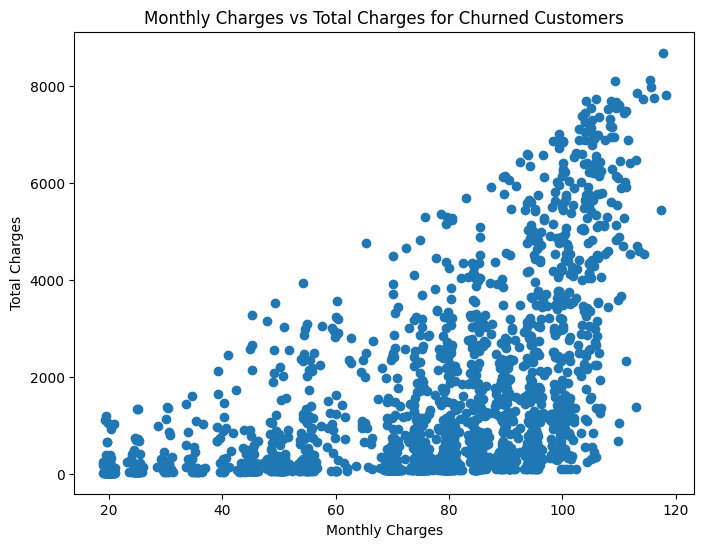

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(churned_customers['MonthlyCharges'], churned_customers['TotalCharges'])
plt.title('Monthly Charges vs Total Charges for Churned Customers')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

In [37]:
service_columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling'
]

**Plotting the relationship between churn and other columns**

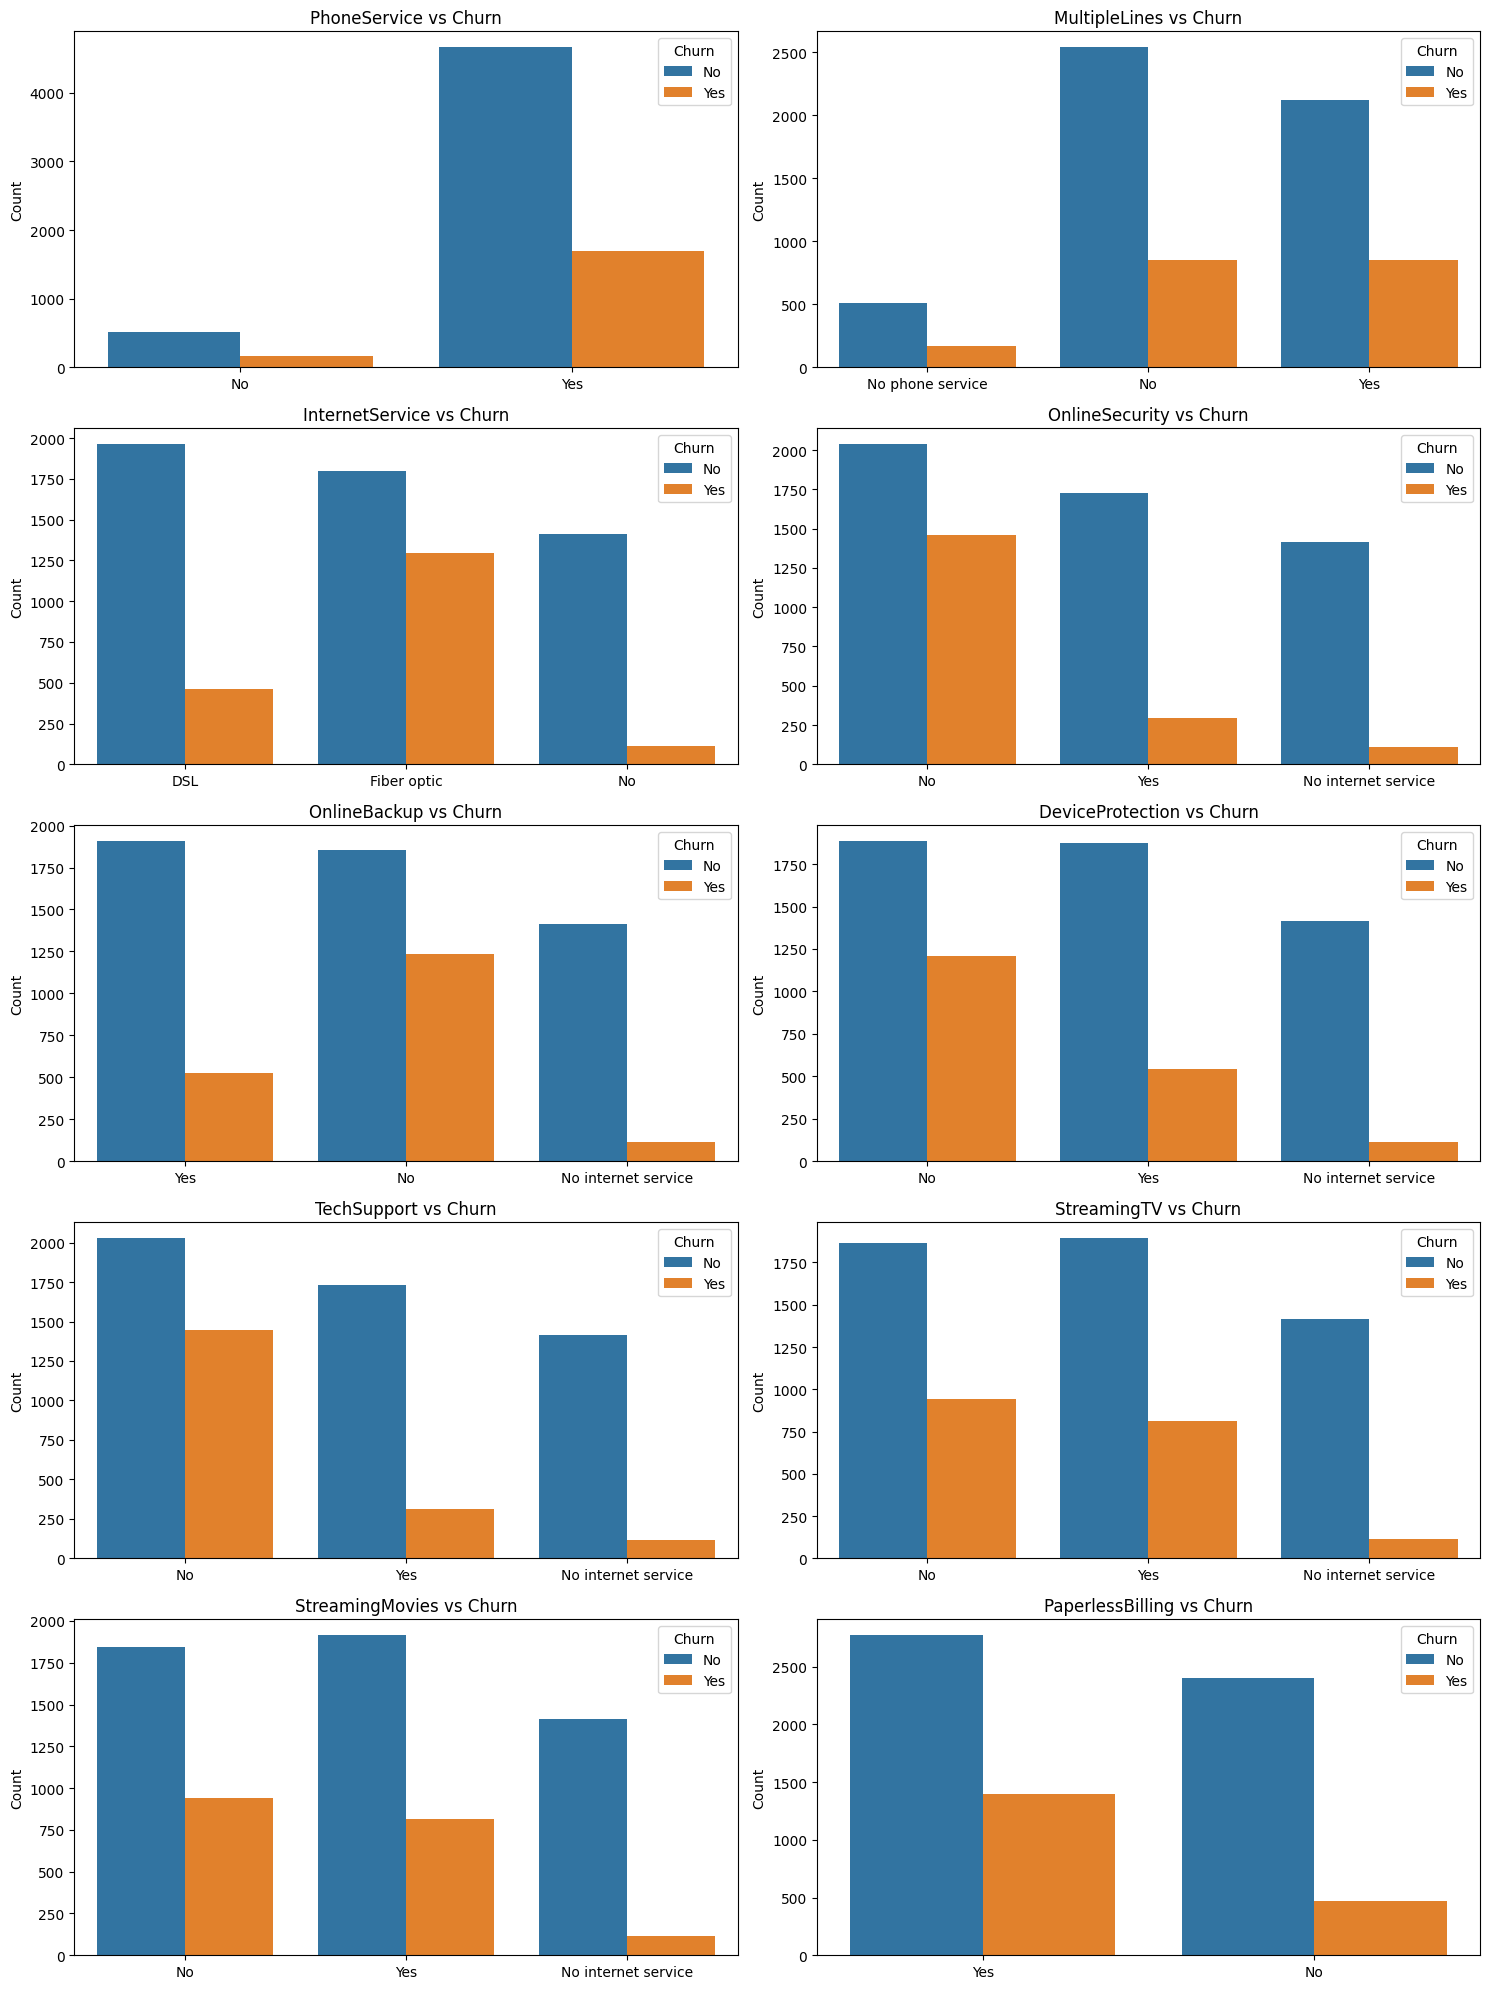

In [38]:
plt.figure(figsize=(15, 20))

for i, col in enumerate(service_columns, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

## **Task Specific Data Preprocessing**

In [49]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [50]:
df.dropna(inplace = True)

In [51]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [53]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.dropna(subset=["TotalCharges"], inplace=True)
df["TotalCharges"] = df["TotalCharges"].astype("float64")
df.drop("customerID", axis=1, inplace=True)

In [54]:
df.shape

(7032, 20)

**grab_col_names categorizes the columns of a given DataFrame (dataframe) into different types based on their data types and unique value counts.**

In [55]:
# define grab_col_names

def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car






*   cat_th (default 10): The threshold for the number of unique values below which a numerical column is considered categorical
*   car_th (default 20): The threshold for the number of unique values above which a categorical column is considered to be "categorical but cardinal


*   Categorization of Columns:

    - Categorical Columns (cat_cols)
    - Categorical but Cardinal Columns (cat_but_car)
    - Numerical Columns (num_cols)






In [56]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7032
Variables: 20
cat_cols: 17
num_cols: 3
cat_but_car: 0
num_but_cat: 1


In [58]:
cat_cols, num_cols, cat_but_car

(['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'Churn',
  'SeniorCitizen'],
 ['tenure', 'MonthlyCharges', 'TotalCharges'],
 [])

**Let's keep tha values as binary only, since no specific service means no**

###  **Evaluating Outliers using the Boxplot**

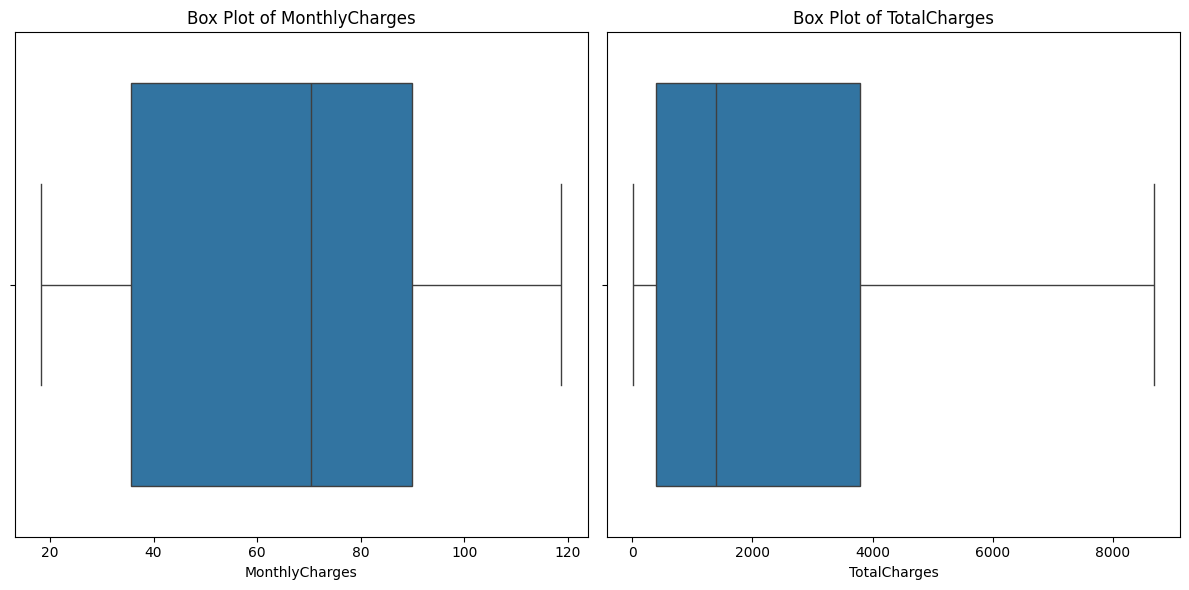

In [61]:
numerical_features = ['MonthlyCharges', 'TotalCharges',]      # As they will help us to get the calculation

plt.figure(figsize=(12, 6))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.boxplot(data=df, x=feature)
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

**We can see from the above data that "TotalCharges" values are right skewed**

### **Encoding**

In [62]:
dfd = df.copy()
cat_cols = [col for col in cat_cols if col not in ["Churn"]]
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

In [63]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first, dtype = int)
    return dataframe
dfd = one_hot_encoder(dfd, cat_cols, drop_first=True)

In [64]:
dfd["Churn"] = dfd["Churn"].map({"No": 0, "Yes":1})

In [65]:

##### Standard Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfd[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(dfd[['MonthlyCharges', 'TotalCharges']])


In [ ]:

# Feature engineering: Create a new feature for tenure categories
dfd['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72], labels=[1, 2, 3, 4, 5])

# Drop tenure as we have created tenure_group
dfd.drop('tenure', axis=1, inplace=True)

In [66]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

##**ML Models**

In [67]:
df["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [68]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [69]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [70]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [71]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7032
Variables: 20
cat_cols: 17
num_cols: 3
cat_but_car: 0
num_but_cat: 1


In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

for col in binary_cols:
    df = label_encoder(df, col)

In [75]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TotalServices"]]
cat_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'SeniorCitizen']

In [76]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first, dtype = int)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

In [77]:
df.head()

,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1
0,0,1,0,1,0,1,29.85,29.85,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,34,1,0,56.95,1889.50,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,2,1,1,53.85,108.15,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,45,0,0,42.30,1840.75,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,0,...,0,0,0,0,0,0,0,1,0,0


In [78]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1
0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0.064303,1,0,-0.260878,-0.173740,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,-1.239504,1,1,-0.363923,-0.959649,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0.512486,0,0,-0.747850,-0.195248,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,0,...,0,0,0,0,0,0,0,1,0,0


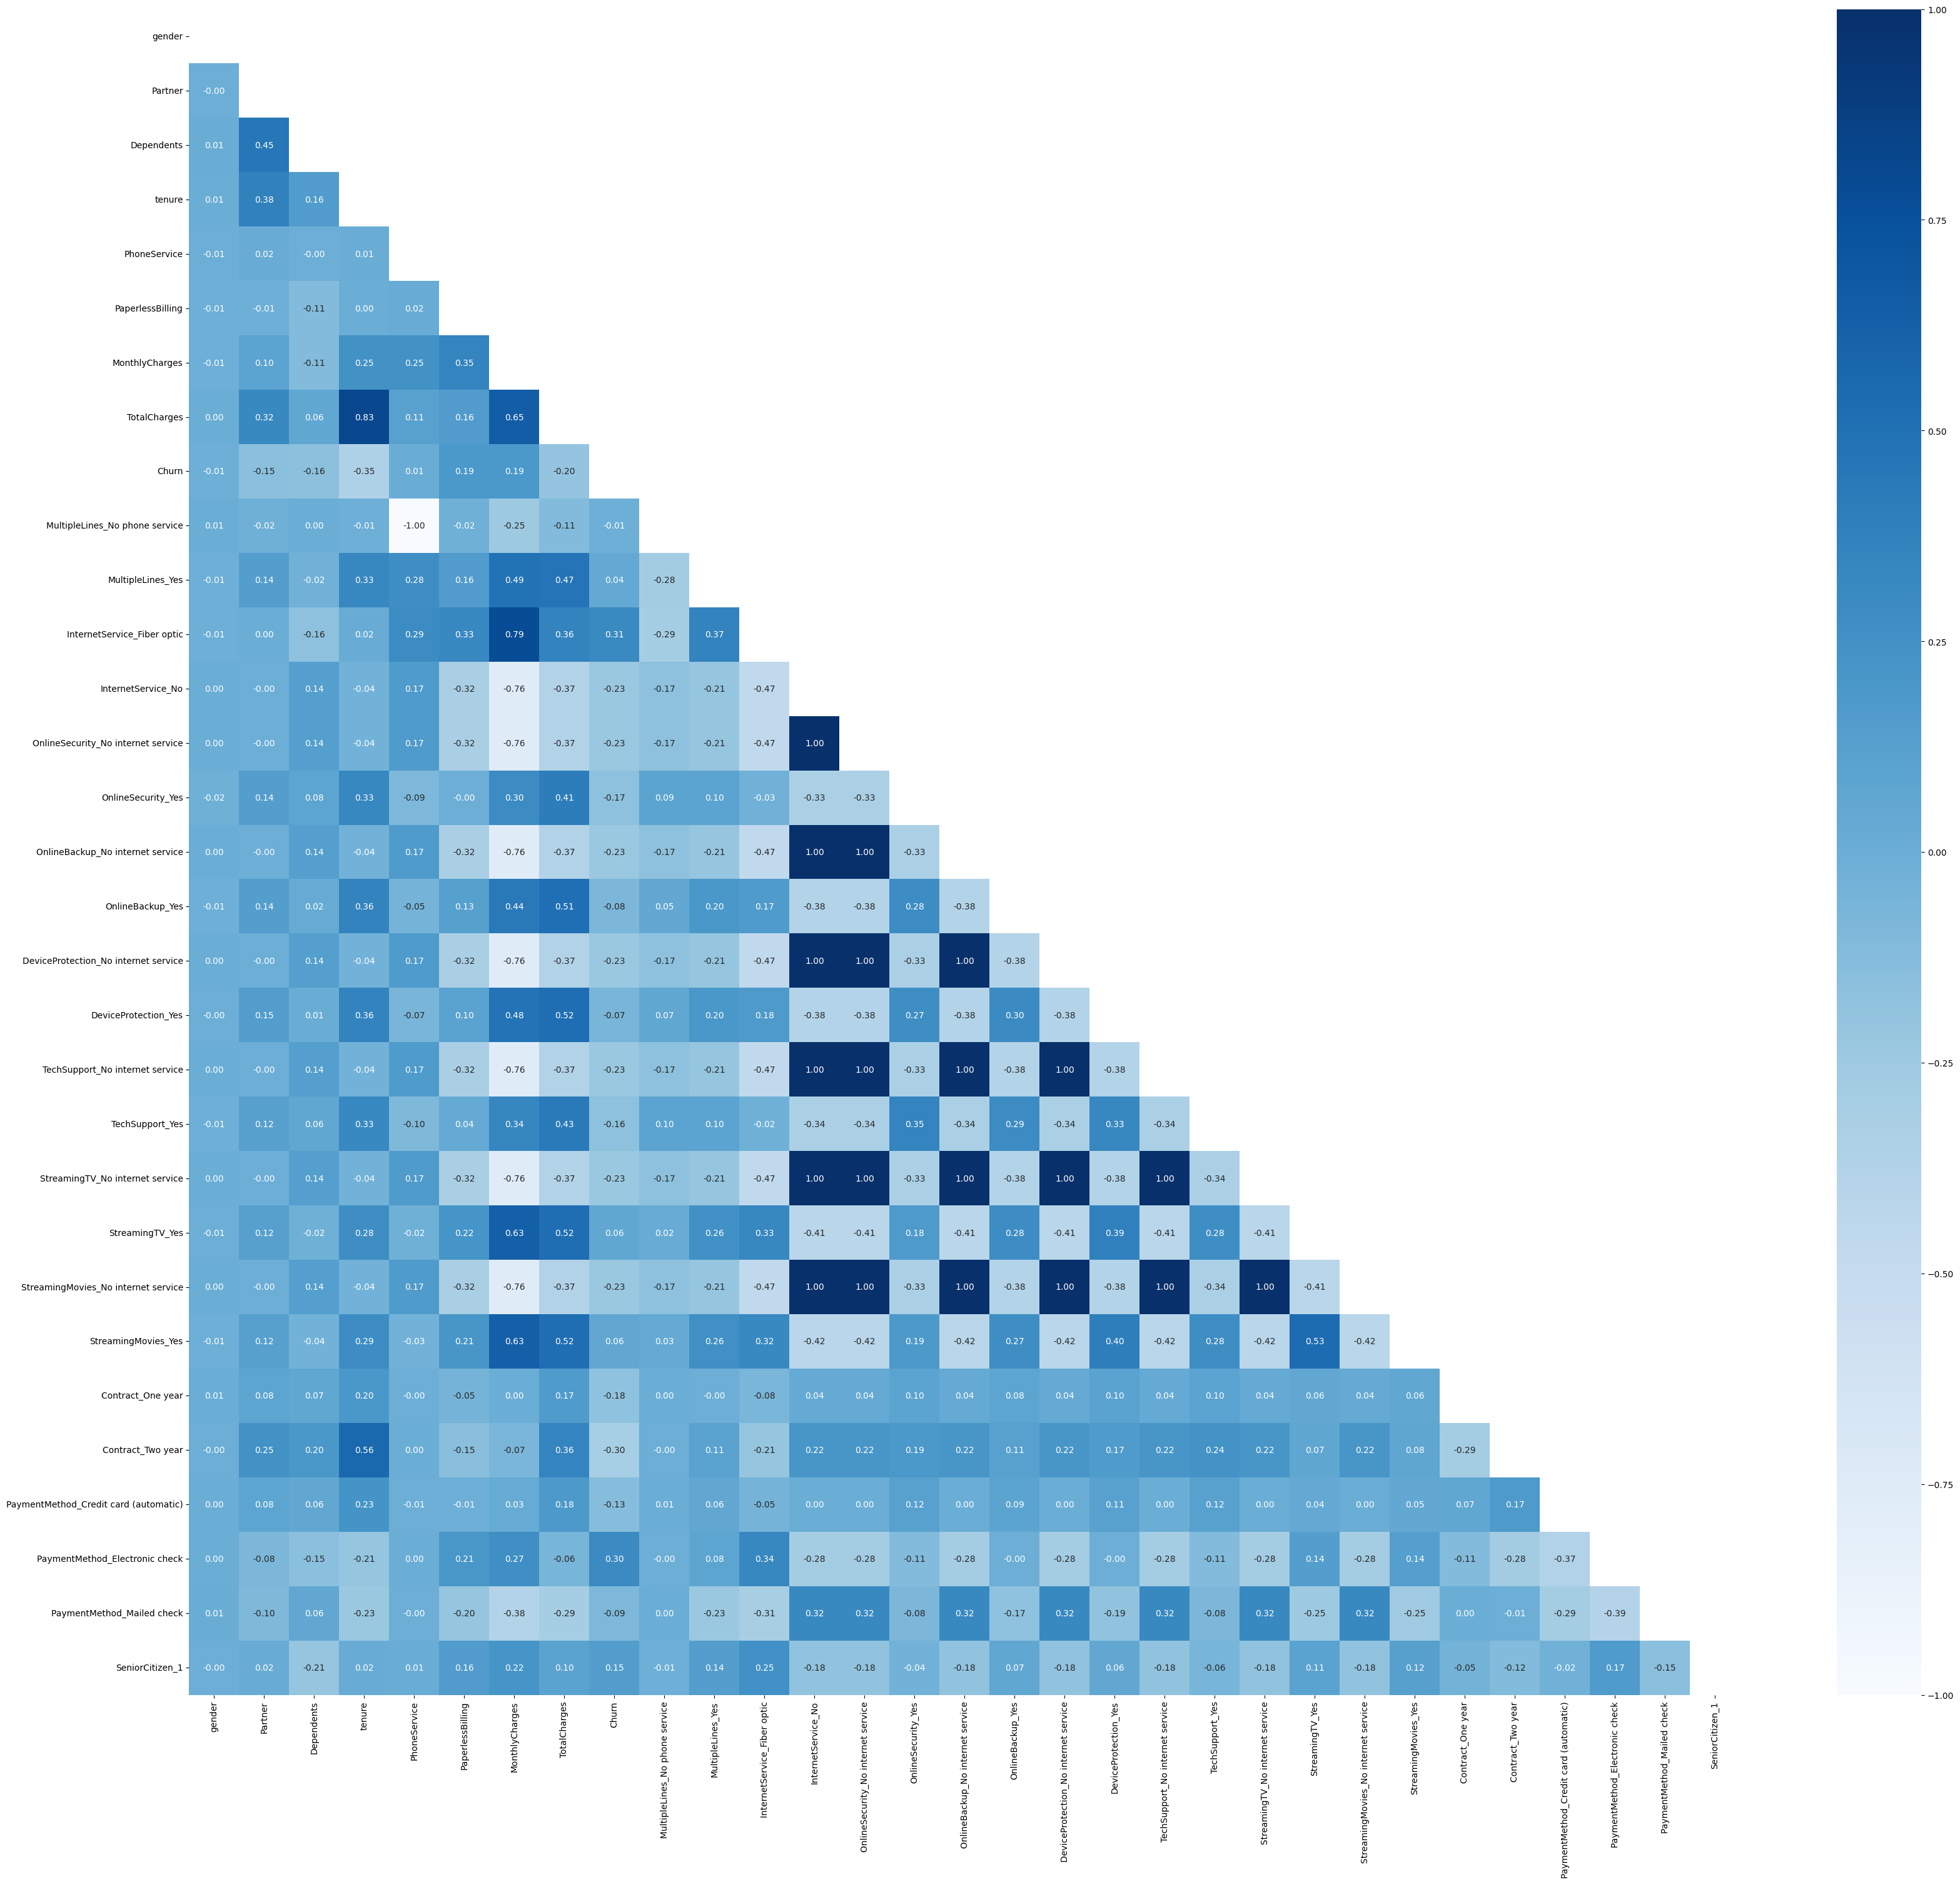

In [79]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(40,35))
sns.heatmap(corr,mask = mask, cmap="Blues", annot=True, fmt=".2f")
plt.show()

In [80]:
df.columns

Index(['gender', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'SeniorCitizen_1'],
      dtype='object')

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
# from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve, auc

In [86]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)


    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(f'{model_name} Classification Report:\n{class_report}')


    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Churn', 'Churn'])
    disp.plot(cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

**RandomForestClassifier**

In [84]:
y = df["Churn"]
X = df.drop("Churn", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.25, random_state=42)

rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


RandomForestClassifier Results:
RandomForest Classifier Accuracy: 0.79
RandomForest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1291
           1       0.63      0.48      0.55       467

    accuracy                           0.79      1758
   macro avg       0.73      0.69      0.70      1758
weighted avg       0.77      0.79      0.78      1758



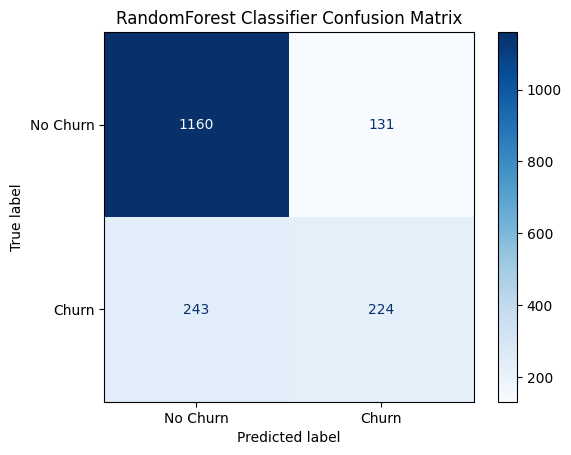

In [87]:
print("\nRandomForestClassifier Results:")
evaluate_model(rf_model, X_test, y_test, "RandomForest Classifier")

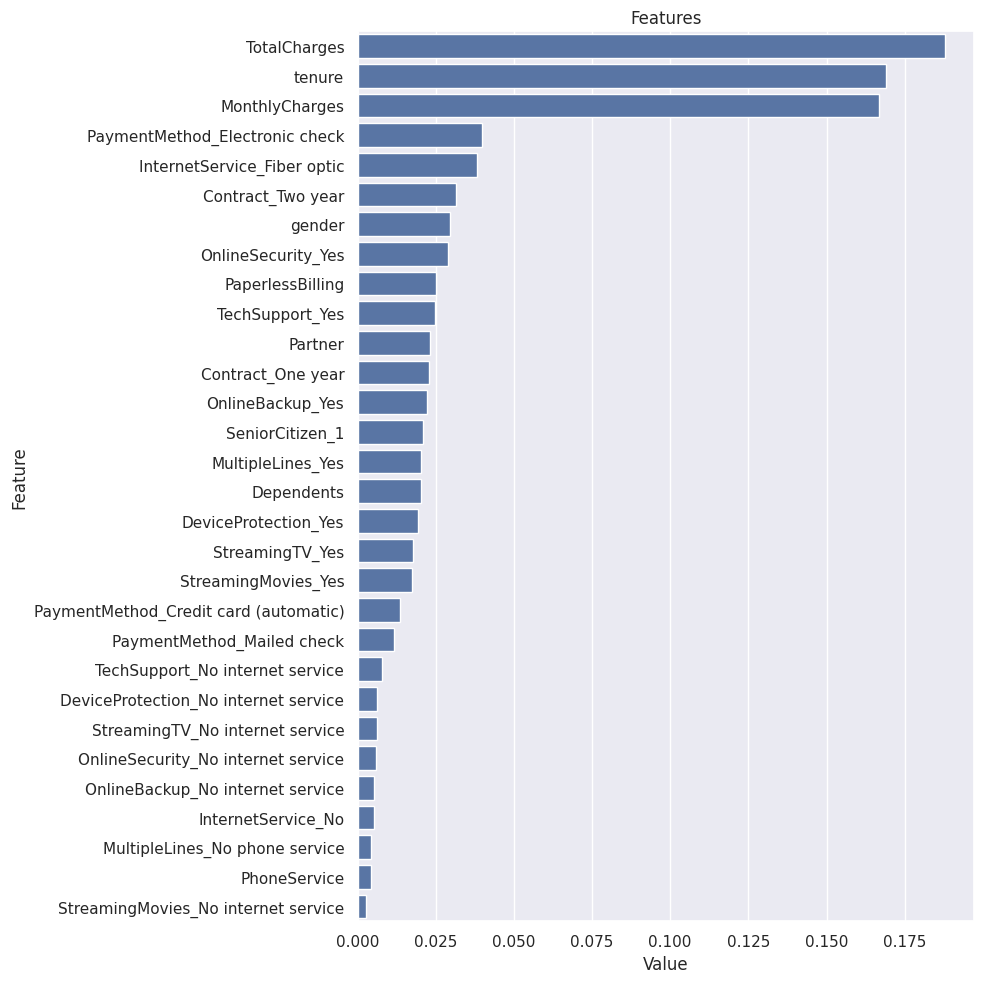

In [88]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X)

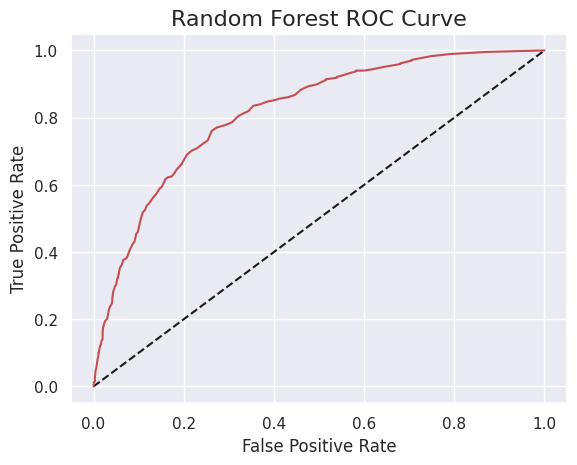

In [94]:
y_rfpred_prob = rf_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

**XGBClassifier**

In [92]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', enable_categorical=True, random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)


XG Boost Classifier Results:
XG Boost Classifier Accuracy: 0.77
XG Boost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1291
           1       0.57      0.50      0.54       467

    accuracy                           0.77      1758
   macro avg       0.70      0.68      0.69      1758
weighted avg       0.76      0.77      0.76      1758



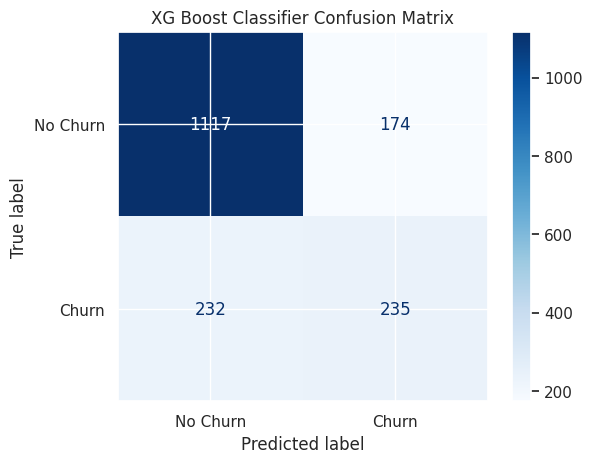

In [93]:
print("\nXG Boost Classifier Results:")
evaluate_model(xgb, X_test, y_test, "XG Boost Classifier")

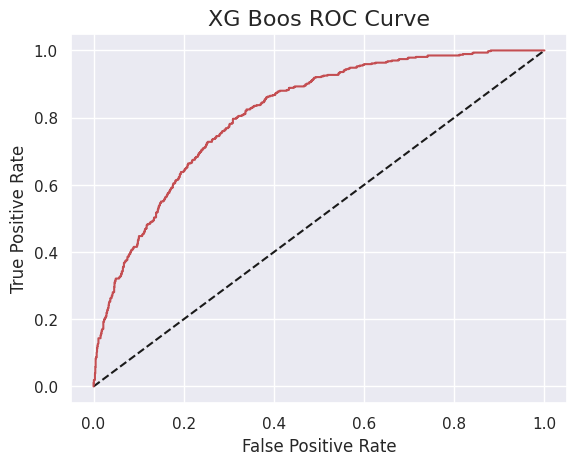

In [114]:
y_rfpred_prob = xgb.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='XG Boost',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XG Boos ROC Curve',fontsize=16)
plt.show();

**Optimize hyperparameters using cross-validation or a grid search method.**

In [115]:
best_params_rf = {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}

In [116]:
best_model = RandomForestClassifier(**best_params_rf, random_state=42)
best_model.fit(X_train, y_train)
y_pred_rf = best_model.predict(X_test)

rf_accuracy=round(accuracy_score(y_test,y_pred_rf), 4)*100
rf_accuracy

79.47

In [117]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params_rf = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_rf = best_model.predict(X_test)
rf_accuracy = round(accuracy_score(y_test, y_pred_rf), 4) * 100

print("Best hyperparameters found: ", best_params_rf)
print("Accuracy of the best model: ", rf_accuracy)


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best hyperparameters found:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 500}
Accuracy of the best model:  79.52


##**Deep Learning Method**

**LSTM**

In [96]:
#Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [97]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1], 1), activation="tanh",
                         return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.LSTM(32, activation="tanh", return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.LSTM(16, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights=True
)

model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
history_lstm = model_lstm.fit(X_train, y_train,
                              validation_data=(X_test, y_test),
                              epochs=50,
                              batch_size=32,
                              callbacks=[early_stopping],
                              verbose=1)

Epoch 1/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.7395 - loss: 0.6548 - val_accuracy: 0.7235 - val_loss: 0.5470
Epoch 2/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.7401 - loss: 0.5401 - val_accuracy: 0.7577 - val_loss: 0.5180
Epoch 3/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.7492 - loss: 0.5147 - val_accuracy: 0.7486 - val_loss: 0.5014
Epoch 4/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - accuracy: 0.7617 - loss: 0.5125 - val_accuracy: 0.7327 - val_loss: 0.5170
Epoch 5/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.7590 - loss: 0.5006 - val_accuracy: 0.7582 - val_loss: 0.4951
Epoch 6/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.7641 - loss: 0.4980 - val_accuracy: 0.7594 - val_loss: 0.4933
Epoch 7/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.7697 - loss: 0.4943 - val_accuracy: 0.7662 - val_loss: 0.4894
Epoch 8/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.7709 - loss: 0.4884 - val_a

In [99]:
loss_and_metrics = model_lstm.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7819 - loss: 0.4550
[0.4537010192871094, 0.7872582674026489]
Loss =  0.4537010192871094
Accuracy =  0.7872582674026489


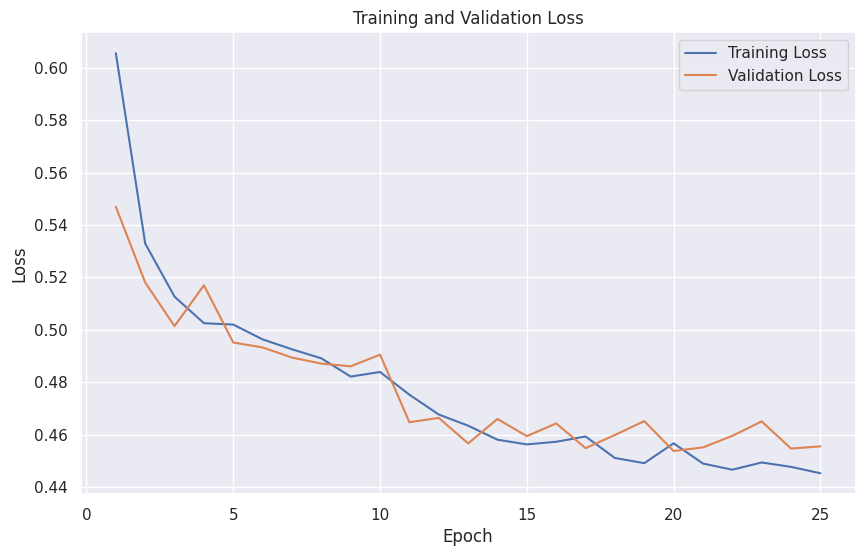

In [100]:
plt.figure(figsize=(10, 6))

train_loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [101]:
predicted_lstm = model_lstm.predict(X_test)
predicted_lstm = tf.squeeze(predicted_lstm)
predicted_lstm = np.array([1 if x >= 0.5 else 0 for x in predicted_lstm])
actual = np.array(y_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [102]:
print(classification_report(y_test,predicted_lstm))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1291
           1       0.64      0.46      0.53       467

    accuracy                           0.79      1758
   macro avg       0.73      0.68      0.70      1758
weighted avg       0.77      0.79      0.78      1758



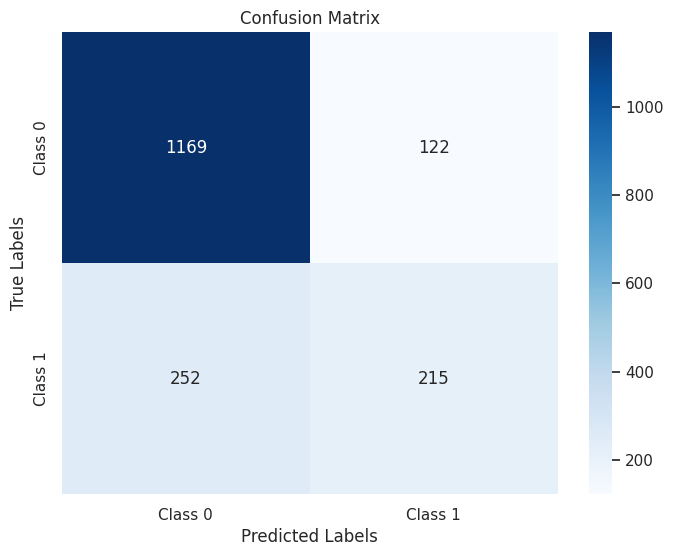

In [103]:
cm = confusion_matrix(y_test, predicted_lstm)

class_labels = ['Class 0', 'Class 1']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [105]:
import shap

In [107]:
df.head()

,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1
0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0.064303,1,0,-0.260878,-0.173740,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,-1.239504,1,1,-0.363923,-0.959649,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0.512486,0,0,-0.747850,-0.195248,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,0,...,0,0,0,0,0,0,0,1,0,0


In [109]:
# SHAP explainer for tree-based model (Random Forest)
explainer = shap.Explainer(rf_model)

# Calculate SHAP values for X_test
shap_values = explainer.shap_values(X_test)

# Print shapes to diagnose the mismatch
print("Shape of SHAP values (class 0):", shap_values[0].shape)
print("Shape of SHAP values (class 1):", shap_values[1].shape)
print("Shape of X_test:", X_test.shape)

# Use the SHAP values for class 1 (positive class for churn)
shap_values_class_1 = shap_values[1]



Shape of SHAP values (class 0): (30, 2)
Shape of SHAP values (class 1): (30, 2)
Shape of X_test: (1758, 30)


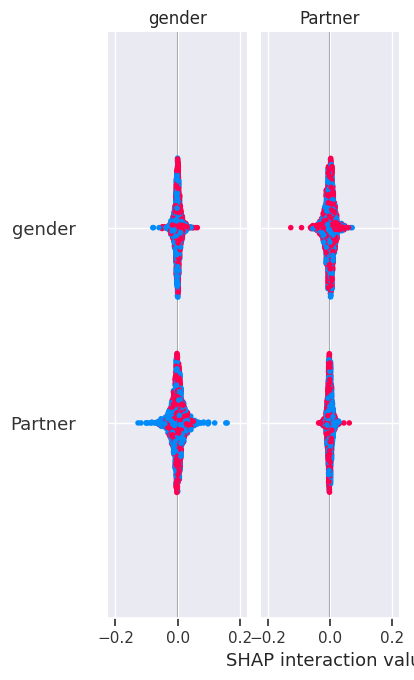

In [111]:
# Try plotting summary plot again
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [112]:
# Calculate SHAP values for X_test (shape correction)
shap_values = explainer(X_test)

# For binary classification, shap_values will be a list with two arrays.
# Use the second array for the positive class (class 1).
shap_values_class_1 = shap_values[..., 1]


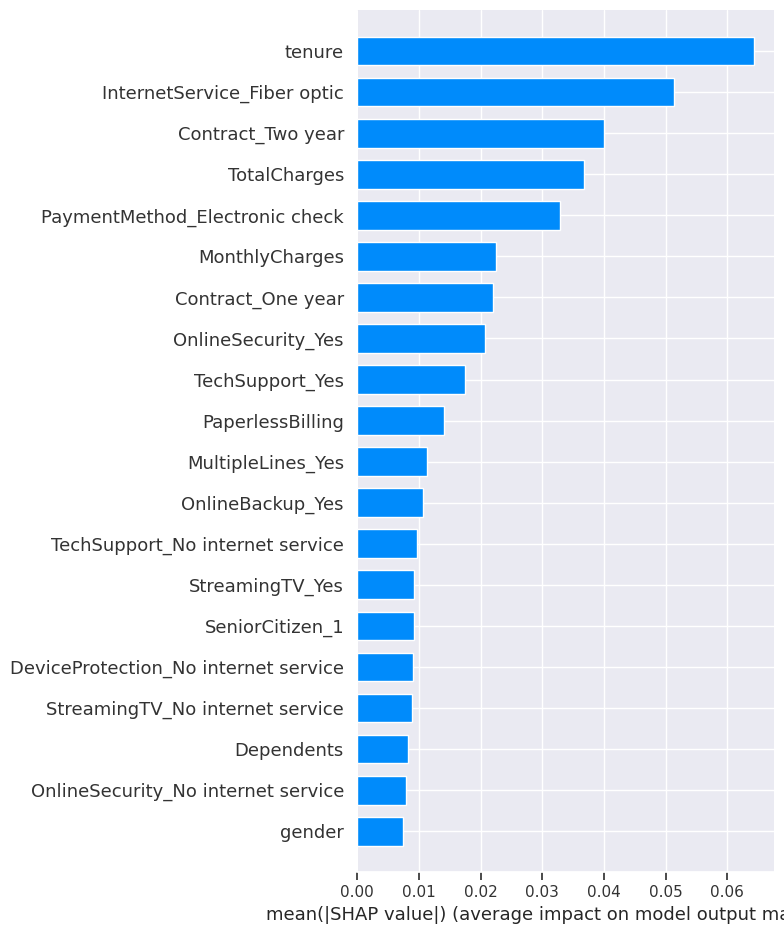

In [113]:
# Summary plot of SHAP values for class 1
shap.summary_plot(shap_values_class_1, X_test, plot_type="bar")


**actions the company could take**

- Since majority of the customer who churned are monthly user, so coming up with better monthly plan will help